Import the librairies

In [1]:
import pandas as pd
import numpy as np
import os
import json
import ast 
import matplotlib.pyplot as plt
import plotly.express as px
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
from plotly.subplots import make_subplots

Import the datasets

In [2]:
PATH_IN = './MovieSummaries/'

def OpenDf(PATH) :
    '''
    This function opens the dataframes stored in the file with location PATH
    '''
    
    character_file = os.path.join(PATH_IN, 'character.metadata.tsv')
    movie_file = os.path.join(PATH_IN, 'movie.metadata.tsv')
    name_file = os.path.join(PATH_IN, 'name.clusters.txt')
    plot_file = os.path.join(PATH_IN, 'plot_summaries.txt')
    tvtrop_file = os.path.join(PATH_IN, 'tvtropes.clusters.txt')

    movie_col= ["Wikipedia movie ID","Freebase movie ID","Movie name","Movie release date",
                 "Movie box office revenue","Movie runtime","Movie languages","Movie countries",
                 "Movie genres"]

    character_col = ["Wikipedia movie ID","Freebase movie ID","Movie release date","Character Name","Actor DOB",
             "Actor gender","Actor height","Actor ethnicity","Actor Name",
             "Actor age at movie release","Freebase character map"]
    name_col = ["Character Name","Freebase character map ?"]

    plot_col = ["Wikipedia movie ID","Plot"]

    characterDF = pd.read_table(character_file,names=character_col,index_col=False)
    movieDF = pd.read_table(movie_file,names=movie_col,index_col=False)
    nameDF = pd.read_csv(name_file, sep="\t",names=name_col,index_col=False)
    plotDF = pd.read_csv(plot_file, sep="\t",names=plot_col,index_col=False)

    tvtrop_f = open(tvtrop_file)
    lines = tvtrop_f.readlines()
    tvtrop_f.close()
    tvtropDF = pd.DataFrame(columns=["stereotype","char","movie","id","actor"])
    for line in lines:
        char_type,dico = line.split("\t")
        dico = json.loads(dico)
        dico["stereotype"] = char_type
        tvtropDF = pd.concat([tvtropDF,pd.DataFrame([dico])],ignore_index=True)
        
    return characterDF,movieDF,nameDF,plotDF,tvtropDF

characterDF,movieDF,nameDF,plotDF,tvtropDF = OpenDf(PATH_IN)

C:\Users\paul\AppData\Local\Temp\ipykernel_12844\2810662041.py:25: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  characterDF = pd.read_table(character_file,names=character_col,index_col=False)


In [3]:
display(characterDF.head(),movieDF.head(),nameDF.head(),plotDF.head(),tvtropDF.head())

,Wikipedia movie ID,Freebase movie ID,Movie release date,Character Name,Actor DOB,Actor gender,Actor height,Actor ethnicity,Actor Name,Actor age at movie release,Freebase character map
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r


,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


,Character Name,Freebase character map ?
0,Stuart Little,/m/0k3w9c
1,Stuart Little,/m/0k3wcx
2,Stuart Little,/m/0k3wbn
3,John Doe,/m/0jyg35
4,John Doe,/m/0k2_zn


,Wikipedia movie ID,Plot
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha..."
1,31186339,The nation of Panem consists of a wealthy Capi...
2,20663735,Poovalli Induchoodan is sentenced for six yea...
3,2231378,"The Lemon Drop Kid , a New York City swindler,..."
4,595909,Seventh-day Adventist Church pastor Michael Ch...


,stereotype,char,movie,id,actor
0,absent_minded_professor,Professor Philip Brainard,Flubber,/m/0jy9q0,Robin Williams
1,absent_minded_professor,Professor Keenbean,Richie Rich,/m/02vchl3,Michael McShane
2,absent_minded_professor,Dr. Reinhardt Lane,The Shadow,/m/0k6fkc,Ian McKellen
3,absent_minded_professor,Dr. Harold Medford,Them!,/m/0k6_br,Edmund Gwenn
4,absent_minded_professor,Daniel Jackson,Stargate,/m/0k3rhh,James Spader


# 2. Influence of movies on society, and vice-versa

### 2 a. Adding real babies names dataset and comparing temporal frequencies between reality and fiction (consider only the 100 most famous movies)

##### Study on the top 100 movies

In [4]:
#show the top 100 movies in an horizontal plotly plot
fig = px.bar(movieDF.where(movieDF["Movie box office revenue"]>0).sort_values(by="Movie box office revenue",ascending=True).head(100), x="Movie box office revenue", y="Movie name", orientation='h')
fig.show()

Wordcloud of the top100 movie names

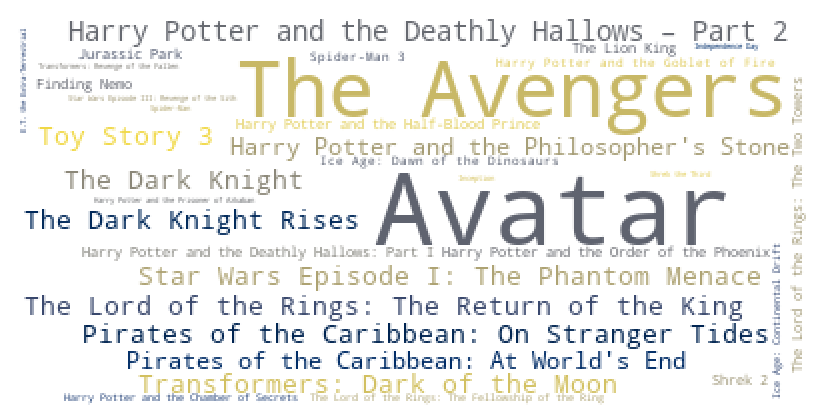

In [5]:
# Drop rows with missing values in the "Movie box office revenue" column
movieDF_cleaned = movieDF.dropna(subset=["Movie box office revenue"])

# Create a dictionary with movie names as keys and their box office revenue as values
movie_name_revenue_dict = dict(zip(movieDF_cleaned["Movie name"], movieDF_cleaned["Movie box office revenue"]))

# Generate the word cloud from the movie names and their box office revenue
wordcloud = WordCloud(
    max_font_size=50,
    background_color="white",
    colormap="cividis",
).generate_from_frequencies(movie_name_revenue_dict)

# Display the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


##### Study on the characters present in the top 100 movies

Import the babyname dataset in the US

In [6]:
# we will extract only the characters from the top 100 movies in the dataset based movieDF["Movie box office revenue"]
top100_characters = characterDF[characterDF["Wikipedia movie ID"].isin(movieDF.sort_values(by="Movie box office revenue",ascending=False)["Wikipedia movie ID"].head(100))]

PATH_IN = './Name/'

def OpenNameDf(PATH) :
    '''
    This function opens the dataframes stored in the file with location PATH
    '''
    
    #for all file present in the folder
    files = os.listdir(PATH)
    nameDF = pd.DataFrame()
    
    for file in files:
        if file.endswith(".txt"):
            name_file = os.path.join(PATH, file)
            # name_col = ["Firstname","Sexe","Number"]
            name_a_yearDF = pd.read_table(name_file, sep=",",index_col=False)
            name_a_yearDF = name_a_yearDF.drop_duplicates()
            name_a_yearDF = name_a_yearDF.drop(name_a_yearDF[name_a_yearDF["Firstname"]=="Firstname"].index)
            #add a column for the year given in the filename
            name_a_yearDF["Year"] = file.split(".")[0].replace("yob","")
            name_a_yearDF.to_csv(os.path.join(PATH_IN, file),index=False)
            
            # Concatenate the new data with the existing data
            nameDF = pd.concat([nameDF, name_a_yearDF])
        
    return nameDF

nameDF = OpenNameDf(PATH_IN)

In [7]:
# Create a set of valid first names from nameDF["Firstname"]
valid_firstnames = set(nameDF["Firstname"])

# Group and aggregate the data to calculate total occurrences by name
name_occurrences = nameDF[nameDF["Firstname"].isin(valid_firstnames)].groupby("Firstname")["Number"].sum().reset_index()


# Create a dictionary that maps first names to their total occurrences
name_occurrences_dict = dict(zip(name_occurrences["Firstname"], name_occurrences["Number"]))

# Define a function to extract the top firstname
def extract_top_firstname(name):
    if isinstance(name, str):
        names = name.split()
        firstnames = [n for n in names if n in valid_firstnames]
        if firstnames:
            top_firstname = max(firstnames, key=lambda n: name_occurrences_dict.get(n, 0))
            return top_firstname
    return None

# Apply the function to the "Character Name" column
top100_characters["Character firstname"] = top100_characters["Character Name"].apply(extract_top_firstname)

# Drop rows where "Character firstname" is NaN
top100_characters.dropna(subset=["Character firstname"], inplace=True)

#count number of unique name in top100
print("Number of unique name in top100 : ",len(top100_characters["Character firstname"].unique()))

# to name_occurences, add the column "First year appearance"
name_occurrences["First year appearance"] = nameDF[nameDF["Firstname"].isin(valid_firstnames)].groupby("Firstname")["Year"].min().reset_index()["Year"]

# Convert "Movie release Date" to a datetime object and extract the year
top100_characters["Year"] = pd.to_datetime(top100_characters["Movie release date"]).dt.year

C:\Users\paul\AppData\Local\Temp\ipykernel_12844\84285032.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\paul\AppData\Local\Temp\ipykernel_12844\84285032.py:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Number of unique name in top100 :  830


C:\Users\paul\AppData\Local\Temp\ipykernel_12844\84285032.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



##### Study on the babies firstname recensed in the US after their presence in a movie

Number of names with their films where the name wasn't present before the film in name_occurrences: 84


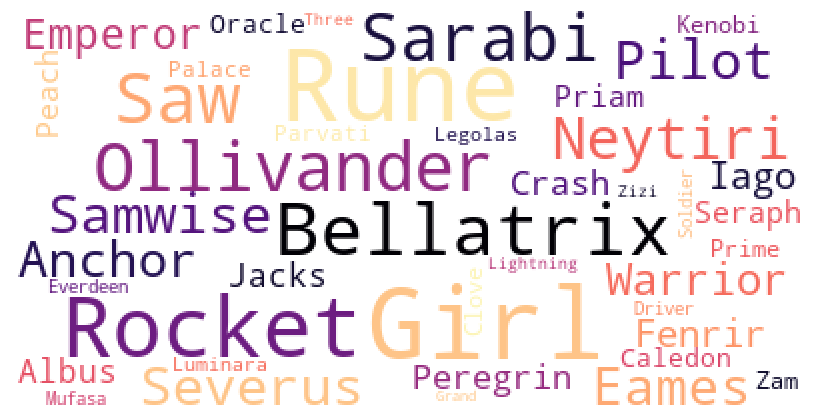

In [8]:
# Merge the DataFrames on the "Firstname" column
merged_data = top100_characters.merge(name_occurrences, left_on="Character firstname", right_on="Firstname", how="left")

# Convert the "First year appearance" and "Year" columns to integers
merged_data["First year appearance"] = merged_data["First year appearance"].astype(int)
merged_data["Year"] = merged_data["Year"].astype(int)

# Filter the rows where "First year appearance" is greater than "Year"
filtered_data = merged_data[merged_data["First year appearance"] > merged_data["Year"]]

# Calculate the number of names and their films
num_names_with_films = len(filtered_data)

# Print the result
print("Number of names with their films where the name wasn't present before the film in name_occurrences:", num_names_with_films)

# Generate the word cloud with a specific colormap (e.g., 'viridis')
wordcloud = WordCloud(
    max_font_size=50,
    max_words=100,
    background_color="white",
    colormap='magma'
).generate_from_frequencies(dict(zip(filtered_data["Character firstname"], filtered_data["Number"])))

# Display the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

In [9]:
# display the movie name linked with these name in a pandaframe by crossing Wikipedia movie ID in movieDF
filtered_data.merge(movieDF, left_on="Wikipedia movie ID", right_on="Wikipedia movie ID", how="left")[["Movie name","Character firstname"]].drop_duplicates()

,Movie name,Character firstname
0,Star Wars Episode III: Revenge of the Sith,Kenobi
1,Star Wars Episode III: Revenge of the Sith,Grand
2,Harry Potter and the Half-Blood Prince,Albus
3,Harry Potter and the Half-Blood Prince,Fenrir
4,Harry Potter and the Half-Blood Prince,Severus
...,...,...
79,Star Wars Episode V: The Empire Strikes Back,Emperor
80,Star Wars Episode V: The Empire Strikes Back,Kenobi
81,Star Wars Episode IV: A New Hope,Grand
82,Star Wars Episode IV: A New Hope,Kenobi


##### Study on the top 20 firstnames in movies over the year

In [10]:
# Choose a year
year = 2022

# Define the valid date range for your dataset
min_valid_date = "1850-01-01"
max_valid_date = "2023-11-11"
characterDF["Year"] = characterDF["Movie release date"].str.extract(r'(\d{4})', expand=False).astype(float)

# Apply the function to the "Character Name" column
characterDF["Character firstname"] = characterDF["Character Name"].apply(extract_top_firstname)
Firstname_characterDF = characterDF
Firstname_characterDF.dropna(subset=["Character firstname"], inplace=True)

# Create a new DataFrame with the number of occurrences of each firstname groupping by the counting given in nameDF of this firstname for each year
# keep only the firstnames present in the film (characterDF["Character firstname"])
name_occurrences_by_year = nameDF.groupby(["Firstname", "Year"])["Number"].sum().reset_index()
name_occurrences_by_year = name_occurrences_by_year[name_occurrences_by_year["Firstname"].isin(characterDF["Character firstname"].unique())]
name_occurrences_by_year["Year"] = pd.to_datetime(name_occurrences_by_year["Year"], format='%Y')

# Horizontal bar
fig = px.bar(name_occurrences_by_year[name_occurrences_by_year["Year"].dt.year == year].sort_values(by="Number",ascending=False).head(20),x="Number",y="Firstname", orientation='h')
fig.show()

In [11]:
name_occurrences_full = pd.DataFrame()

for year in range(1850, 2023):
    year_datetime = pd.to_datetime(year, format='%Y')
    year_data = name_occurrences_by_year[name_occurrences_by_year["Year"].dt.year == year].sort_values(by="Number", ascending=False).head(50)
    name_occurrences_full = pd.concat([name_occurrences_full, year_data])

print("Number of unique names in top 100: ", len(name_occurrences_full["Firstname"].unique()))


Number of unique names in top 100:  283


In [12]:
# create a huge subplot line with plotly of 17x17
# each subplot is a simple plot line of the number of occurence of a firstname for each year between 1850 and 2023
# for each subplot, the name is the firstname and the color is the number of occurence, sort the order aphabetically
# do a very simple plot with only the line, no extra stuff as the plot will be enormous
# display the plot
fig = make_subplots(rows=17, cols=17, subplot_titles=sorted(name_occurrences_full["Firstname"].unique()), shared_xaxes=True, shared_yaxes=True)

# Loop over the sorted list of unique first names
for i, firstname in enumerate(sorted(name_occurrences_full["Firstname"].unique())):
    fig.add_trace(px.line(name_occurrences_full[name_occurrences_full["Firstname"]==firstname], x="Year", y="Number", title=firstname).data[0], row=i//17+1, col=i%17+1)
    fig.update_xaxes(showticklabels=False, showgrid=False, row=i//17+1, col=i%17+1)
    fig.update_yaxes(showticklabels=False, showgrid=False, row=i//17+1, col=i%17+1)

fig.update_annotations(font_size=8)
fig.update_layout(
    height=1000,
    width=1000,
    title_text="Firstname occurence number in top50 movies in the US, 1850-2023",
    plot_bgcolor="white",
    yaxis=dict(showticklabels=False, showgrid=False),
    yaxis_title="",
    showlegend=False,
    font=dict(size=8),
    xaxis=dict(showticklabels=False, showgrid=False),
    xaxis_title="",
    title_font_size=20,  # set font size of subplot titles
)
fig.show()

##### Make a comparison between in the world and in the movies

In [13]:
TOP = 400

# keep the top 400 firstname in nameDF
firstname_occurrences_by_year = Firstname_characterDF.groupby(["Year", "Character firstname", "Actor gender"]).size().reset_index(name="Number of Occurrences")
# add a column of firstname_occurrences_by_year where it is the Total number of occurences of this firstname in the dataset
firstname_occurrences_by_year["Total number of occurences"] = firstname_occurrences_by_year.groupby(["Character firstname", "Actor gender"])["Number of Occurrences"].transform("sum")

top400_firstnamesDF = nameDF.merge(firstname_occurrences_by_year, left_on="Firstname", right_on="Character firstname", how="left")
top400_firstnamesDF = top400_firstnamesDF[top400_firstnamesDF["Year_x"].astype(float)==top400_firstnamesDF["Year_y"].astype(float)]
top400_firstnamesDF["Year"] = top400_firstnamesDF["Year_x"]
top400_firstnamesDF = top400_firstnamesDF.drop(columns=["Year_x","Year_y"])
top400_firstnamesDF["Firstname"] = top400_firstnamesDF["Firstname"]
top400_firstnamesDF = top400_firstnamesDF.drop(columns=["Character firstname"])
top400_firstnamesDF = top400_firstnamesDF.rename(columns={"Number":"Number of birth","Number of Occurrences":"Number of occurences in movies"})
top400_firstnamesDF =top400_firstnamesDF.drop(columns=["Actor gender"])

# keep the top 400 unique firstname in top400_firstnamesDF in column Number of occurences in movies
keep_top_400 = top400_firstnamesDF.drop_duplicates(subset=["Firstname"])
keep_top_400 = keep_top_400.sort_values(by="Total number of occurences",ascending=False).head(TOP)
top400_firstnamesDF = top400_firstnamesDF[top400_firstnamesDF["Firstname"].isin(keep_top_400["Firstname"])]

sum_by_name_gender = top400_firstnamesDF.groupby(["Firstname", "Sexe"])["Number of birth"].sum().reset_index().rename(columns={"Number of birth": "Number"})
idx_max_gender = sum_by_name_gender.groupby("Firstname")["Number"].idxmax()
max_gender_lines = sum_by_name_gender.loc[idx_max_gender]

top400_firstnamesDF = top400_firstnamesDF.merge(max_gender_lines, on=["Firstname", "Sexe"], how="inner")

Test with one firstname (here example with Christopher)

In [14]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

firstname = "Christopher"

fig1 = make_subplots(
    rows=1,
    cols=1,
    specs=[[{"secondary_y": True}]]
)

# Sort the dataframes by "Year" for consistency
df1 = top400_firstnamesDF[top400_firstnamesDF["Firstname"] == firstname].sort_values(by="Year")
df2 = top400_firstnamesDF[top400_firstnamesDF["Firstname"] == firstname].sort_values(by="Year")

# Add a trace for the first line (e.g., blue)
trace1 = go.Scatter(x=df1["Year"], y=df1["Number of birth"], mode='lines', name="Number of Birth", line=dict(color='blue'))

# Add a trace for the second line (e.g., red)
trace2 = go.Scatter(x=df2["Year"], y=df2["Number of occurences in movies"], mode='lines', name="Number of Occurrences in Movies", line=dict(color='red'), yaxis="y2")

# Update the subplot and axis properties
fig1.add_trace(trace1, row=1, col=1)
fig1.add_trace(trace2, row=1, col=1, secondary_y=True)

fig1.update_xaxes(title_text='Year', row=1, col=1)
fig1.update_xaxes(showticklabels=True, row=1, col=1)  # Show x-axis tick labels

# Hide y-axis labels for both traces
fig1.update_yaxes(showticklabels=False, row=1, col=1)
fig1.update_yaxes(showticklabels=False, row=1, col=1, secondary_y=True)

# Set the subplot title as the firstname
fig1.update_layout(title_text=firstname)

# Show the figure
fig1.show()


Not really useful or interesting to interpret on numbers, so we plot their frequencies

In [15]:
# Calculate the sum of the number of births and number of firstnames for each year
births_by_year = nameDF.groupby("Year")["Number"].sum().reset_index()
firstnames_by_year = nameDF.groupby("Year")["Firstname"].count().reset_index()

firstname = "Christopher"

# Sort the dataframes by "Year" for consistency
df1 = top400_firstnamesDF[top400_firstnamesDF["Firstname"] == firstname].sort_values(by="Year")
df2 = top400_firstnamesDF[top400_firstnamesDF["Firstname"] == firstname].sort_values(by="Year")

# Calculate the frequency for each year using apply
df1["Frequency"] = df1.apply(lambda row: row["Number of birth"] / births_by_year[births_by_year["Year"] == row["Year"]]["Number"].values[0], axis=1)
df2["Frequency"] = df2.apply(lambda row: row["Number of occurences in movies"] / firstnames_by_year[firstnames_by_year["Year"] == row["Year"]]["Firstname"].values[0], axis=1)

# Rename the columns
df1 = df1.rename(columns={"Frequency": "Frequency of Birth"})
df2 = df2.rename(columns={"Frequency": "Frequency in Movies"})

fig1 = make_subplots(
    rows=1,
    cols=1,
    specs=[[{"secondary_y": True}]]
)

# Add a trace for the first line (e.g., blue)
trace1 = go.Scatter(x=df1["Year"], y=df1["Frequency of Birth"], mode='lines', name="Frequency of Birth", line=dict(color='blue'))

# Add a trace for the second line (e.g., red)
trace2 = go.Scatter(x=df2["Year"], y=df2["Frequency in Movies"], mode='lines', name="Frequency of Occurrences in Movies", line=dict(color='red'), yaxis="y2")

# Update the subplot and axis properties
fig1.add_trace(trace1, row=1, col=1)
fig1.add_trace(trace2, row=1, col=1, secondary_y=True)

fig1.update_xaxes(title_text='Year', row=1, col=1)
fig1.update_xaxes(showticklabels=True, row=1, col=1)  # Show x-axis tick labels

# Hide y-axis labels for both traces
fig1.update_yaxes(showticklabels=False, row=1, col=1)
fig1.update_yaxes(showticklabels=False, row=1, col=1, secondary_y=True)

# Set the subplot title as the firstname
fig1.update_layout(title_text=firstname)

# Show the figure
fig1.show()

In [16]:
fig = make_subplots(
    rows=20,
    cols=20,
    subplot_titles=sorted(top400_firstnamesDF["Firstname"].unique()),
    specs=[[{"secondary_y": True}] * 20] * 20
)

legends_added = False  # A flag to ensure legends are added only once

for i, firstname in enumerate(sorted(top400_firstnamesDF["Firstname"].unique())):
    row = i // 20 + 1
    col = i % 20 + 1
    
    # Sort the dataframes by "Year" for consistency
    df1 = top400_firstnamesDF[top400_firstnamesDF["Firstname"] == firstname].sort_values(by="Year")
    df2 = top400_firstnamesDF[top400_firstnamesDF["Firstname"] == firstname].sort_values(by="Year")

    # Calculate the frequency for each year using apply
    df1["Frequency"] = df1.apply(lambda row: row["Number of birth"] / births_by_year[births_by_year["Year"] == row["Year"]]["Number"].values[0], axis=1)
    df2["Frequency"] = df2.apply(lambda row: row["Number of occurences in movies"] / firstnames_by_year[firstnames_by_year["Year"] == row["Year"]]["Firstname"].values[0], axis=1)

    # Rename the columns
    df1 = df1.rename(columns={"Frequency": "Frequency of Birth"})
    df2 = df2.rename(columns={"Frequency": "Frequency in Movies"})

    fig1 = make_subplots(
        rows=1,
        cols=1,
        specs=[[{"secondary_y": True}]]
    )

    if row==1:
        # Add a trace for the first line (e.g., blue)
        trace1 = go.Scatter(x=df1["Year"], y=df1["Frequency of Birth"], mode='lines', name="Frequency of Birth", line=dict(color='blue'),legendgroup='Frequency of birth')
        # Add a trace for the second line (e.g., red)
        trace2 = go.Scatter(x=df2["Year"], y=df2["Frequency in Movies"], mode='lines', name="Frequency of Occurrences in Movies", line=dict(color='orange'),legendgroup='Frequency of occurence in movies', yaxis="y2")

    # Add a trace for the first line (e.g., blue)
    trace1 = go.Scatter(x=df1["Year"], y=df1["Frequency of Birth"], mode='lines', name="Frequency of Birth", line=dict(color='blue'),legendgroup='Frequency of birth',showlegend=False)
    # Add a trace for the second line (e.g., red)
    trace2 = go.Scatter(x=df2["Year"], y=df2["Frequency in Movies"], mode='lines', name="Frequency of Occurrences in Movies", line=dict(color='orange'),legendgroup='Frequency of occurence in movies',showlegend=False, yaxis="y2")

    # Add the traces to the subplot
    fig.add_trace(trace1, row=row, col=col)
    fig.add_trace(trace2, row=row, col=col, secondary_y=True)

    fig.update_xaxes(title_text='', row=row, col=col)  # Remove x-axis label
    fig.update_yaxes(title_text='', row=row, col=col)  # Remove y-axis label for the primary y-axis
    fig.update_yaxes(title_text='', row=row, col=col, secondary_y=True)  # Remove y-axis label for the secondary y-axis
    fig.update_xaxes(showticklabels=False, showgrid=False, row=row, col=col)
    fig.update_yaxes(showticklabels=False, showgrid=False, row=row, col=col)
    fig.update_yaxes(showticklabels=False, showgrid=False, row=row, col=col, secondary_y=True)

    # Set the subplot title as the firstname using update_xaxes
    # fig.update_xaxes(title_text=firstname, row=row, col=col)

# Update the figure properties
fig.update_annotations(font_size=8)
fig.update_layout(
    height=1000,
    width=1400,  # Increase the width to accommodate the legend
    title_text="Firstname occurrence frequency in top400 names over the years",
    plot_bgcolor="white",
    showlegend=True,  # Show the full plot legend
    legend=dict(
        orientation="v",  # Set orientation to vertical for a legend on the right
        x=1.05,  # Adjust the x position as needed
        y=0.5,  # Adjust the y position as needed
        itemsizing='constant',  # Set the size of legend items to be constant
        tracegroupgap=10,  # Add some space between the legend groups
        traceorder="normal",  # Set the order of the legend items
        bgcolor="white",  # Set the background color of the legend
        bordercolor="black",  # Set the border color of the legend
        borderwidth=1,  # Set the border width of the legend
        font=dict(size=8),  # Set the font size of the legend
        title=dict(text="Legend"),  # Set the title of the legend
    ),
    font=dict(size=8),
    xaxis=dict(showticklabels=False, showgrid=False),
    xaxis_title="",
    title_font_size=20,  # set font size of subplot titles
)


# Show the figure
fig.show()

In [17]:
correlationDF = pd.DataFrame(columns=["Firstname", "Correlation"])

for i, firstname in enumerate(sorted(top400_firstnamesDF["Firstname"].unique())):
    row = i // 20 + 1
    col = i % 20 + 1
    
    # Sort the dataframes by "Year" for consistency
    df1 = top400_firstnamesDF[top400_firstnamesDF["Firstname"] == firstname].sort_values(by="Year")
    df2 = top400_firstnamesDF[top400_firstnamesDF["Firstname"] == firstname].sort_values(by="Year")

    # Calculate the frequency for each year using apply
    df1["Frequency"] = df1.apply(lambda row: row["Number of birth"] / births_by_year[births_by_year["Year"] == row["Year"]]["Number"].values[0], axis=1)
    df2["Frequency"] = df2.apply(lambda row: row["Number of occurences in movies"] / firstnames_by_year[firstnames_by_year["Year"] == row["Year"]]["Firstname"].values[0], axis=1)

    # Rename the columns
    df1 = df1.rename(columns={"Frequency": "Frequency of Birth"})
    df2 = df2.rename(columns={"Frequency": "Frequency in Movies"})
    
    correlationDF = pd.concat([correlationDF, pd.DataFrame([[firstname, df1["Frequency of Birth"].corr(df2["Frequency in Movies"])]], columns=["Firstname", "Correlation"])])

C:\Users\paul\AppData\Local\Temp\ipykernel_12844\3866632939.py:19: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

c:\Users\paul\OneDrive\Documents\GitHub\ada-2023-project-tea4two\.venv\lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning:

Degrees of freedom <= 0 for slice

c:\Users\paul\OneDrive\Documents\GitHub\ada-2023-project-tea4two\.venv\lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning:

divide by zero encountered in divide

c:\Users\paul\OneDrive\Documents\GitHub\ada-2023-project-tea4two\.venv\lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning:

invalid value encountered in multiply

c:\Users\paul\OneDrive\Documents\GitHub\ada-2023-project-tea4two\.venv\lib\site-packages\numpy\lib\function_

In [18]:
# Create an empty DataFrame to store the results
cross_correlation_results = pd.DataFrame(columns=["FirstName", "Cross-Correlation", "Time Delay"])

# Iterate through the first names
for firstname in top400_firstnamesDF["Firstname"].unique():
    # Sort the dataframes by "Year" for consistency
    df1 = top400_firstnamesDF[top400_firstnamesDF["Firstname"] == firstname].sort_values(by="Year")
    df2 = top400_firstnamesDF[top400_firstnamesDF["Firstname"] == firstname].sort_values(by="Year")

    # Calculate the frequency for each year using apply
    df1["Frequency"] = df1.apply(lambda row: row["Number of birth"] / births_by_year[births_by_year["Year"] == row["Year"]]["Number"].values[0], axis=1)
    df2["Frequency"] = df2.apply(lambda row: row["Number of occurences in movies"] / firstnames_by_year[firstnames_by_year["Year"] == row["Year"]]["Firstname"].values[0], axis=1)

    # Rename the columns
    df1 = df1.rename(columns={"Frequency": "Frequency of Birth"})
    df2 = df2.rename(columns={"Frequency": "Frequency in Movies"})

    # Calculate the cross-correlation and time delay
    cross_correlation = np.correlate(df1["Frequency of Birth"], df2["Frequency in Movies"], mode='full')
    time_delay = np.argmax(cross_correlation) - (len(df2) - 1)  # Calculate the time delay

    # Create a new DataFrame with the result for this firstname
    result_df = pd.DataFrame({"FirstName": [firstname], "Cross-Correlation": [cross_correlation], "Time Delay": [time_delay]})

    # Concatenate the result with the main DataFrame
    cross_correlation_results = pd.concat([cross_correlation_results, result_df], ignore_index=True)

In [225]:
import pandas as pd
import plotly.express as px
import numpy as np

# Prepare Data
df = cross_correlation_results

# Group the data by 'Time Delay' and aggregate the 'FirstName' into a sorted list
dflist = df.groupby('Time Delay')['FirstName'].apply(lambda x: sorted(x)).reset_index()

# Rename the columns for clarity
dflist.columns = ['Time Delay', 'FirstNameList']

# Remove all 0 Time Delay in dflist and store them in another DataFrame
dflist_0 = dflist[dflist["Time Delay"] == 0]
dflist = dflist[dflist["Time Delay"] != 0]
dflist['colors'] = dflist['Time Delay'].astype(float)

# Convert the list of first names into a comma-separated string
dflist['FirstNameList'] = dflist['FirstNameList'].apply(lambda names: ', '.join(names))

# Sort the DataFrame by the 'Time Delay' column in ascending order
dflist = dflist.sort_values(by="Time Delay", ascending=True).reset_index(drop=True)

# Create Diverging Bars Plot with the RdYlGn colormap using the log_colors
fig = px.bar(
    dflist,
    x='Time Delay',
    y=dflist.index,  # Use the index as y-axis values
    color='colors',  # Use the log transformed values for color
    text='FirstNameList',  # Now it contains comma-separated names
    orientation='h',
    width=1500,  # Increase the width to provide more space for the legend
    height=1000,
    color_continuous_scale='RdYlGn',  # Use a diverging colormap
    color_continuous_midpoint= 4.14,
)
fig.update_traces(
    textfont_size=12, 
    textangle=0, 
    textposition="outside",
    cliponaxis=True,
)
fig.update_xaxes(side="top")  # Move the x-axis to the top

# Update the layout for better appearance
fig.update_layout(
    yaxis_title='',
    xaxis_title='Time Delay (Year)',
    title='Comparison of Time Delay for Firstnames between Birth and Movies',
    xaxis=dict(
        title_font=dict(size=10),  # Set the x-axis title font size
        tickfont=dict(size=8),
    ),
    font=dict(size=20),  # Set the main title font size
    title_x=0.5,  # Center-align the title
    yaxis=dict(
        tickvals=dflist.index,
        ticktext=dflist['FirstNameList'],  # Use 'FirstName' column for tick labels
        tickfont=dict(size=8),
        showticklabels=False,
        showgrid=False
    ),
    showlegend=False,
    plot_bgcolor="white",
    margin=dict(t=150, b=40),  # Adjust the top and bottom margins as needed
)

# Set the coloraxis title to reflect the log scale
fig.update_coloraxes(colorbar_title="Time Delay")
fig.update_coloraxes(colorbar_tickfont_size=8)  # Set the color axis font size
fig.update_coloraxes(colorbar_len=0.6, colorbar_thickness=20)  # Adjust the color bar size


#Add annotations
str1="Movies in advance of Birth"
str2="Movies after Birth"
fig.add_annotation(x=-12, y=60, text=str1, font=dict(size=16), showarrow=False)
fig.add_annotation(x=7, y=23, text=str2, font=dict(size=16), showarrow=False)

fig.show()


first_names = dflist_0["FirstNameList"].values[0]
formatted_names = ",\n".join(", ".join(first_names[i:i+10]) for i in range(0, len(first_names), 10))
print("The first names that have 0 time delay are:")
print(formatted_names)


The first names that have 0 time delay are:
Abraham, Al, Albert, Alice, Allen, Andrew, Andy, Anita, Anjali, Anne,
Anthony, Arnold, Audrey, Bar, Ben, Bernard, Bruno, Bunny, Captain, Carlos,
Catherine, Charlie, Charlotte, Chief, Chloe, Claire, Clara, Colin, Colonel, Count,
Daisy, Daniel, Doctor, Donald, Douglas, Driver, Earl, El, Elaine, Eleanor,
Elena, Elizabeth, Ellen, Emma, Ernie, Eugene, Eva, Evelyn, Felix, Frankie,
Freddy, Girl, Grace, Gus, Gwen, Harvey, Hector, Henry, Iris, Jacob,
Jake, Janet, Jesse, Jessie, Julia, Karl, Kate, Kenny, Khan, Kitty,
Lady, Lawrence, Lee, Leo, Leon, Leonard, Lewis, Lieutenant, Little, Lola,
Lord, Lucy, Luke, Maggie, Major, Man, Marcus, Maurice, Moe, Mohan,
Molly, Mona, Morris, Nancy, Ned, Nelson, Nina, Nora, Norman, Oliver,
Oscar, Philip, President, Priest, Queen, Raju, Ravi, Raymond, Rosa, Rose,
Ruby, Ruth, Samuel, Shankar, Sharma, Sheila, Sheriff, Shirley, Sonia, Stella,
Sylvia, Ted, The, Thomas, Vanessa, Vera, Veronica, Victor, Victoria, Vikram,
Vinc